# Basics of Python

You would need python 3.7 or above to make use of FMS code.
But before we go into the code all of us should have a basic understanding of the ZMQ message interface.

We will cover 
    1. basics of python < no classes or inheritance but just functions and lambdas >
        - functions
            -lambda functions (lambda x: 'do something')
            -higher order functions.
            -decorators and closure
            -multi and caches
        - list comprehensions <greedy as well as lazy>
    2. basics of zmq messaging system.
    3. why async? and generator
    4. When to event loop , to thread and to go for a new process.
    5. logging and monitoring.
What else
    1. Service discovery.
    2. Auto load balancing.
    3. Authentication
    

In [100]:
def somefun(x):
    print("Saving to xls")
    print (x)

def someother(x):
    print("saving to pdf {x}")

In [101]:
myfun = somefun
myfun = someother
myfun(10*2)

saving to pdf {x}


In [106]:
{"SaveTo":lambda x:f" this is lambda {x}" , "b": "I AM NO FUNCTION"}.get("SaveTo") ("some str")


' this is lambda some str'

## Higher order functions.

Functions are first class citizens in python. 
What does this mean ? 

Means that you can assign , manipulate and pass on the functions as if passing variables.


In [120]:
"""Sample Code to define function"""
def pow (x,p):
    if p <= 1:
        return x
    else:
        return x * (pow(x,p-1))

Now we can call this function


In [110]:
pow(3,3)

27

I can use this function to define specifics. Functions in python can be passed around as variables.
For example look at the following code.


In [121]:
square_it = lambda x: pow(x,2)

What is purly functional.... 

In [112]:
square_it(-4)

16

I would like to validate the number before i can submit it to pow function.

In [113]:
def pos(fun):
    def _inner(x,y):
        if y>= 0:
            va = fun(x,y)
            return f" The Output is {va}"
        else:
            print("Cant use this function with negetive powers!")
    return _inner

In [116]:
pow = pos (pow) # @ for syntatic sugar ...  wrappers around existing objects... 

print(pow(2,2))

 The Output is  The Output is  The Output is  The Output is  The Output is  The Output is 2 The Output is  The Output is  The Output is 2


In [117]:
@pos
def pow(x,p):
    if p <= 1:
        return x
    else:
        return x * (pow(x,p-1))

In [90]:
pow(2,4)

' The Output is  The Output is  The Output is  The Output is 2 The Output is 2 The Output is  The Output is 2 The Output is 2 The Output is  The Output is  The Output is 2 The Output is 2 The Output is  The Output is 2 The Output is 2'

### fog pattern

f(g(x)) pattern and its iterations can be easily done now.

In [25]:
# composing two or more functions ... 
def compose(*funs):
    # f of g of h of x where x is the data .
    def _inner(data):
        result = data
        for f in reversed(funs):
            result = f(result)
        return result
    return _inner
            

In [135]:
def inc (x):
    return x+1

myfun = compose(lambda x : f"THE ANSWER IS {x}",square_it,inc)
newfun  = compose (myfun,inc)

In [136]:
[newfun(i) for i in range(5)]

['THE ANSWER IS 4',
 'THE ANSWER IS 9',
 'THE ANSWER IS 16',
 'THE ANSWER IS 25',
 'THE ANSWER IS 36']

In [138]:
filterEven  = lambda x : x if x%2==0 else 0


In [143]:
list(filter(filterEven,range(10)))

[2, 4, 6, 8]

In [169]:
genlist = (x for x in range(20000000000) if x < 17)# list comprehension and lazy evaluation.

In [194]:
# yield. keyword... 
def myiter (x):
    while True:
        x = x+1
        yield x
        print("This is after Yield")
        yield x*x

i -> 1
This is after Yield
i -> 1
i -> 2
This is after Yield
i -> 4
i -> 3
This is after Yield
i -> 9
i -> 4
This is after Yield
i -> 16
i -> 5
This is after Yield
i -> 25
i -> 6
This is after Yield
i -> 36
i -> 7
This is after Yield
i -> 49
i -> 8
This is after Yield
i -> 64
i -> 9
This is after Yield
i -> 81
i -> 10
This is after Yield
i -> 100
i -> 11
This is after Yield


In [200]:
next(f)

3

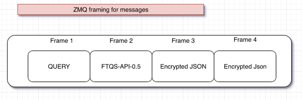

In [221]:
def myfirstcolsure (x):
    y = 5
    def _inner(data):
        nonlocal y
        y = y + x
        print(x , y , data)
    return _inner

In [248]:

def myclass (z):
    k = 15
    def myfirstcolsure (x):
        y = 5
        def _inner(data):
            nonlocal y,z,k,x
            z = z + 1
            k = k + 10
            y = y + x
            x = x + 30
            print(x , y ,k,z ,data)
        return _inner
    return myfirstcolsure

In [249]:

f1 = myclass (100)

In [250]:
f2 = f1(22)
f3 = f1(44)

In [251]:
f2(1)

52 27 25 101 1


In [252]:
f3(1)

74 49 35 102 1


More deep dive into Higher order functions.

In [8]:
def mke_counter(i):
    _val = i
    def _inner():
        nonlocal _val
        _val = _val + 1
        return _val
    return _inner

In [9]:
mycount = mke_counter(1)

In [12]:
mycount()

4

In [15]:
mycfcount = mke_counter(0)

In [18]:
mycfcount()

3

In [19]:
# get f(init) , next f(f(init) , f(f(f(init))))
def iterate (f,ini):
    v = ini
    while True:
        v = f(v)
        yield v

In [20]:
def inc(x):
    return x+1

In [21]:
myvallist = iterate(inc,0)

In [22]:
myvallist

<generator object iterate at 0x103711390>

In [23]:
next(myvallist)

1

In [24]:
next(myvallist)

2

In [26]:
def sq(x):
    return x*x

f = compose(sq,inc)

In [27]:
mynewlist = iterate(f,1)

In [30]:
next(mynewlist)

676

In [35]:
# fibonacci series ... 
# [ 1 1 2 3 5 8 13 21 ... ]
def f (l): # l is a list
    x = l[1]
    y = x + l[0]
    return [x,y]

In [46]:
myfib = iterate(f,[1,1])

In [47]:
[next(myfib)[0] for i in range(10)]

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [50]:
x = list("shyam")
x[1:]

['h', 'y', 'a', 'm']

In [63]:
# obj.fun... get values ... 
# list.entries() , list.first(),list.reverse()
# entries(list) , first(list),reverse(list)

# scanner - > take a trigger value , and give a fun which finds the trig in the data given.
# for ex... trig = "mail"  my data is " you got mailman at the door ", yes found ...

def scanner (trig_str):
    trig = list(trig_str)
    curr = trig
    
    def _helper (data):
        d_str = list(data)
        nonlocal curr
        for d in d_str:
            if len(curr):
                if curr[0] == d:
                    curr = curr[1:]
                    if len(curr) == 0:
                        curr = trig
                        return f"{trig_str} found !"
                else:
                    curr = trig
    return _helper

In [64]:
scan_bomb = scanner("bomb")

In [69]:
scan_bomb("you have all this mumbo")


In [70]:
scan_bomb("mbo jumbo ")

'bomb found !'

In [81]:
list_to_scan = ['infy','infosys','edgeverve','bomb']
list_scanner = [scanner(data) for data in list_to_scan]
data = "infy as a company is very vigilent and takes b"
data = " scare very seriously with home made bom"
data = "bombay is one DC "
scanned_output = [f(data) for f in list_scanner]

In [82]:

scanned_output

[None, None, None, 'bomb found !']

In [ ]:
# data driven coding... 